**check for the number of tickers in the S&P 500 index and print the first five of them**

In [2]:

import yahoo_fin.stock_info as si
import pandas as pd

sp500_list = si.tickers_sp500()
print("Number of Tickers in S&P 500:", len(sp500_list))
sp500_list[0:10]


Number of Tickers in S&P 500: 505


['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE']

In [3]:
for i in sp500_list[9:20]:
    print(i)

ADBE
ADI
ADM
ADP
ADSK
AEE
AEP
AES
AFL
AIG
AIZ


**iterate through the list and obtain our data for each of the tickers**

In [4]:
sp500_historical = {}

for ticker in sp500_list:
    sp500_historical[ticker] = si.get_data(ticker, start_date="01/01/2018", index_as_date = False, interval="1d")

In [106]:
lst = list(sp500_historical.keys())

In [107]:
import random
print(random.sample(lst, 2))

['LNT', 'HBAN']


In [117]:
list(sp500_historical.values())[:1]

[           date    open    high     low   close  adjclose   volume ticker
 0    2018-01-02   67.42   67.89   67.34   67.60    65.523  1047800      A
 1    2018-01-03   67.62   69.49   67.60   69.32    67.191  1698900      A
 2    2018-01-04   69.54   69.82   68.78   68.80    66.687  2230700      A
 3    2018-01-05   68.73   70.10   68.73   69.90    67.753  1632500      A
 4    2018-01-08   69.73   70.33   69.55   70.05    67.898  1613400      A
 ...         ...     ...     ...     ...     ...       ...      ...    ...
 1017 2022-01-14  144.04  145.15  142.36  144.68   144.680  2225400      A
 1018 2022-01-18  142.42  143.24  140.34  140.47   140.470  1907400      A
 1019 2022-01-19  140.67  143.60  140.26  140.43   140.430  1472100      A
 1020 2022-01-20  141.38  143.14  139.05  139.48   139.480  1861200      A
 1021 2022-01-21  139.54  140.49  137.49  137.51   137.510  1878600      A
 
 [1022 rows x 8 columns]]

In [118]:
x, y = list(sp500_historical.items())[0]
print(x, y)

A            date    open    high     low   close  adjclose   volume ticker
0    2018-01-02   67.42   67.89   67.34   67.60    65.523  1047800      A
1    2018-01-03   67.62   69.49   67.60   69.32    67.191  1698900      A
2    2018-01-04   69.54   69.82   68.78   68.80    66.687  2230700      A
3    2018-01-05   68.73   70.10   68.73   69.90    67.753  1632500      A
4    2018-01-08   69.73   70.33   69.55   70.05    67.898  1613400      A
...         ...     ...     ...     ...     ...       ...      ...    ...
1017 2022-01-14  144.04  145.15  142.36  144.68   144.680  2225400      A
1018 2022-01-18  142.42  143.24  140.34  140.47   140.470  1907400      A
1019 2022-01-19  140.67  143.60  140.26  140.43   140.430  1472100      A
1020 2022-01-20  141.38  143.14  139.05  139.48   139.480  1861200      A
1021 2022-01-21  139.54  140.49  137.49  137.51   137.510  1878600      A

[1022 rows x 8 columns]


**Obtained 505 data frames, now concatenating them**

In [119]:
data = pd.concat(sp500_historical)
data.reset_index(drop=True, inplace=True)
data

,date,open,high,low,close,adjclose,volume,ticker
0,2018-01-02,67.42,67.89,67.34,67.60,65.523,1047800,A
1,2018-01-03,67.62,69.49,67.60,69.32,67.191,1698900,A
2,2018-01-04,69.54,69.82,68.78,68.80,66.687,2230700,A
3,2018-01-05,68.73,70.10,68.73,69.90,67.753,1632500,A
4,2018-01-08,69.73,70.33,69.55,70.05,67.898,1613400,A
...,...,...,...,...,...,...,...,...
512581,2022-01-14,206.94,207.40,203.41,206.18,206.180,2209100,ZTS
512582,2022-01-18,201.80,204.29,200.33,202.70,202.700,2433800,ZTS
512583,2022-01-19,202.84,205.90,200.06,200.58,200.580,2159600,ZTS
512584,2022-01-20,201.00,206.25,200.97,201.96,201.960,2844200,ZTS


**we only need the adjusted closing prices and the date columns**

In [120]:
data = data.pivot(index='date', columns='ticker', values = 'adjclose')
data.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,65.523,51.648,103.325,41.188,80.227,87.760,192.49,54.864,144.704,177.70,...,42.665,64.537,67.973,65.023,64.943,76.113,120.352,103.71,45.440,70.103
2018-01-03,67.191,51.014,104.260,41.181,81.483,88.086,195.82,54.985,145.372,181.04,...,42.379,65.830,69.308,64.801,65.734,76.048,121.186,105.77,45.386,70.425
2018-01-04,66.687,51.336,108.107,41.372,81.018,87.890,199.25,54.892,147.094,183.22,...,42.049,67.018,69.404,64.791,66.173,76.822,121.012,107.86,45.574,70.845
2018-01-05,67.753,51.316,109.256,41.843,82.428,88.954,202.32,55.051,148.307,185.34,...,41.755,70.498,69.348,65.701,66.049,77.269,122.215,109.54,45.592,71.656
2018-01-08,67.898,50.809,108.487,41.688,81.108,90.429,207.80,54.892,149.492,185.04,...,42.067,70.964,69.659,66.147,66.288,77.400,122.447,110.63,45.368,72.515


**describe method and set the decimal point to 3**

In [121]:
pd.set_option('precision', 3)
data.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
ticker,,,,,,,,
A,1022.0,94.480,32.962,59.394,68.389,78.879,120.016,178.822
AAL,1022.0,26.876,11.293,9.040,17.967,26.814,33.630,56.989
AAP,1022.0,157.832,33.054,73.517,138.270,154.254,168.284,241.650
AAPL,1022.0,84.183,41.876,34.509,46.842,66.694,124.302,182.010
ABBV,1022.0,86.488,17.668,55.550,74.273,81.560,100.411,136.780
ABC,1022.0,93.727,16.234,67.177,81.804,87.152,104.005,136.450
ABMD,1022.0,287.436,70.767,130.510,251.523,295.765,334.058,449.750
ABT,1022.0,88.665,23.647,52.763,68.287,82.797,109.211,140.963
ACN,1022.0,212.793,67.404,128.001,156.740,188.529,251.767,414.346


**To check if we have any missing values**

**use the missingno library to plot the missing values**

<AxesSubplot:>

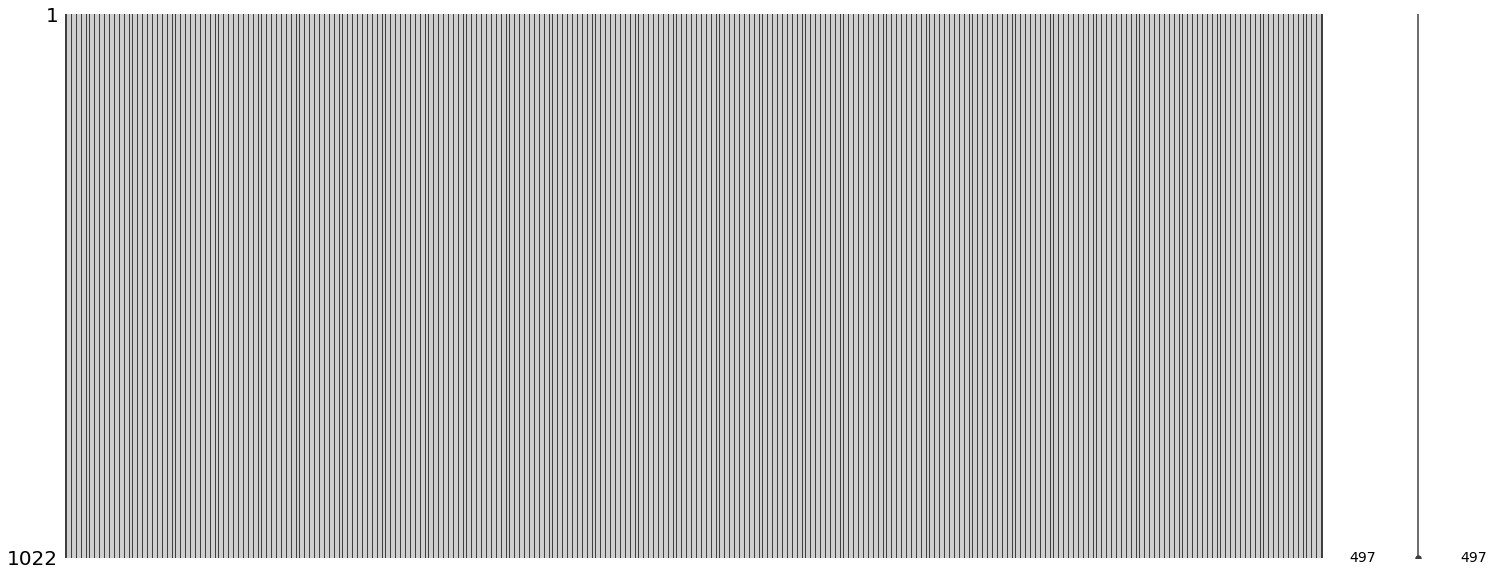

In [125]:
import missingno
missingno.matrix(data)

In [63]:
print('Data Shape before cleaning =', data.shape)

missing_percentage = data.isnull().mean().sort_values(ascending=False)
#print(missing_percentage.head(10))
dropped_list = sorted(list(missing_percentage[missing_percentage > 0.2].index))
data.drop(labels=dropped_list, axis=1, inplace=True)

print('Data Shape after cleaning =', data.shape)

Data Shape before cleaning = (1022, 505)
Data Shape after cleaning = (1022, 497)


**filling the missing values by the last available value in the column**

In [64]:
data = data.fillna(method='ffill')

In [65]:
data.drop(columns='CDAY',inplace = True)

In [66]:
data.isnull().values.any()

False

**save it as a CSV file for future use**

In [67]:
data.to_csv('S&P500_stock_data')

**finding volatility and returns**

In [68]:
import numpy as np

#Calculate returns and create a data frame
returns = data.pct_change().mean()*266
returns = pd.DataFrame(returns)
returns.columns = ['returns']

#Calculate the volatility
returns['volatility'] = data.pct_change().std()*np.sqrt(266)

data = returns

data.head()


,returns,volatility
ticker,,
A,0.234,0.286
AAL,-0.097,0.647
AAP,0.264,0.344
AAPL,0.414,0.337
ABBV,0.177,0.306


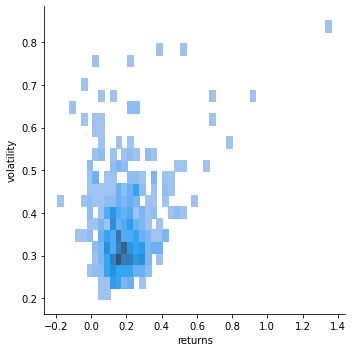

In [71]:
import seaborn as sns
sns.displot(data, x="returns", y="volatility")

In [72]:
from sklearn.preprocessing import StandardScaler

#Prepare the scaler
scale = StandardScaler().fit(data)

#Fit the scaler
scaled_data = pd.DataFrame(scale.fit_transform(data),columns = data.columns, index = data.index)
X = scaled_data
X.head()
# X.columns

,returns,volatility
ticker,,
A,0.296,-0.795
AAL,-2.249,2.805
AAP,0.523,-0.214
AAPL,1.678,-0.288
ABBV,-0.142,-0.593


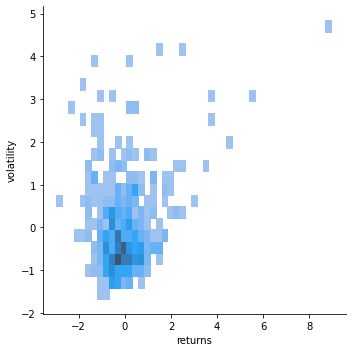

In [73]:
sns.displot(X, x="returns", y="volatility")

**Elbow Method**

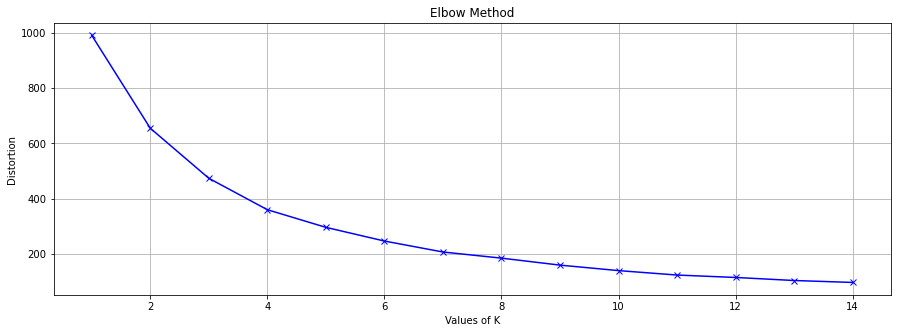

In [23]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

K = range(1,15)
distortions = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

**using the kneed library that finds the optimal number of clusters**

In [24]:
from kneed import KneeLocator
kl = KneeLocator(K, distortions, curve="convex", direction="decreasing")
kl.elbow

4

**Silhouette Method**

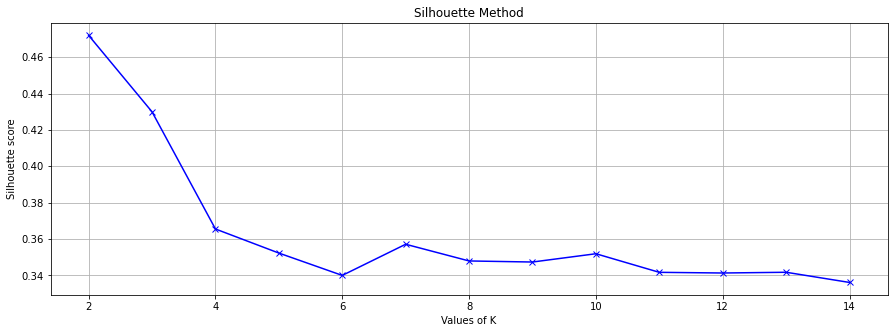

In [25]:
from sklearn.metrics import silhouette_score

#For the silhouette method k needs to start from 2
K = range(2,15)
silhouettes = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()

In [26]:
kl = KneeLocator(K, silhouettes, curve="convex", direction="decreasing")
print('Suggested number of clusters: ', kl.elbow)

Suggested number of clusters:  6


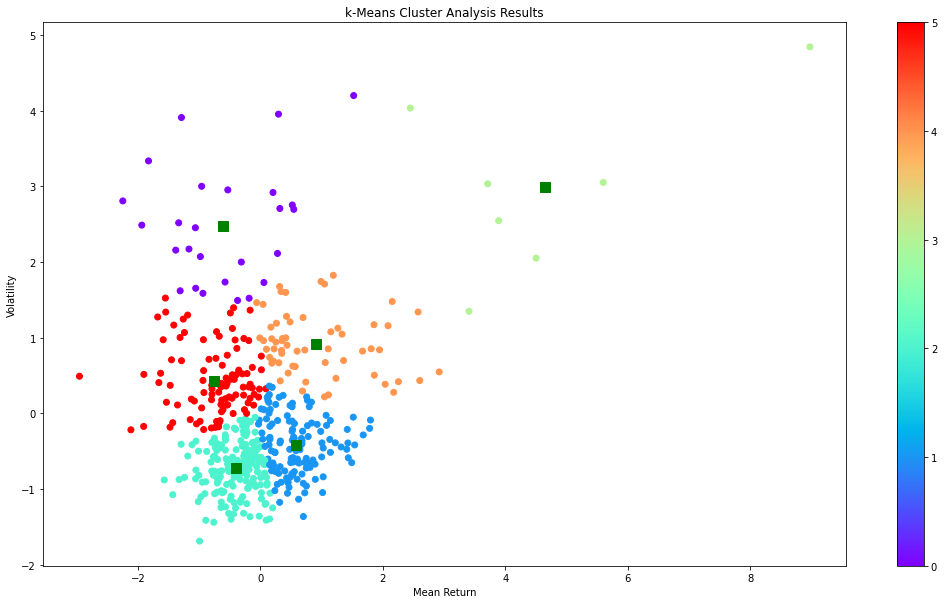

In [27]:
c =6
#Fit the model
k_means = KMeans(n_clusters=c)
k_means.fit(X)
prediction = k_means.predict(X)

#Plot the results
centroids = k_means.cluster_centers_ 
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Cluster Analysis Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=10)
plt.show()

# Hierarchical Clustering

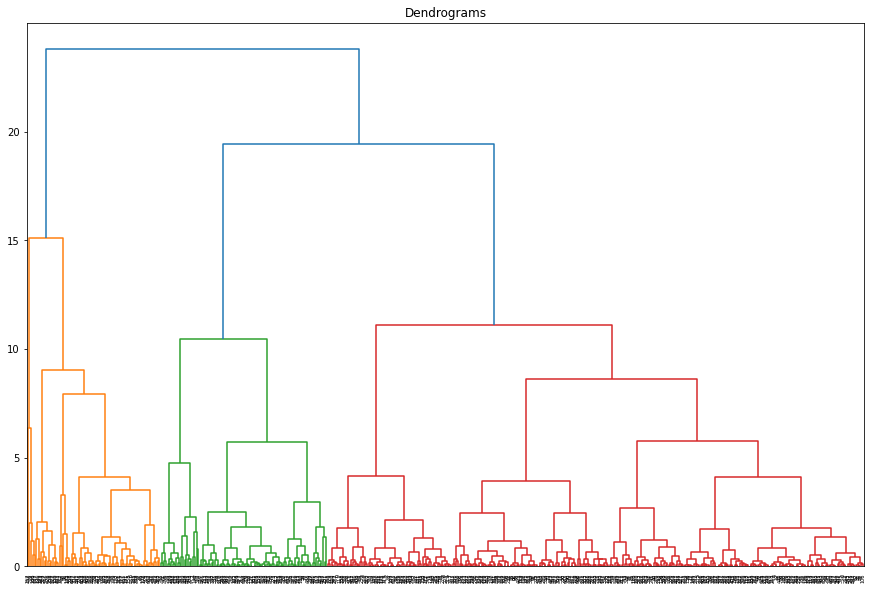

In [29]:
#x-axis is represented by stock , y-axis represents the distance between them
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

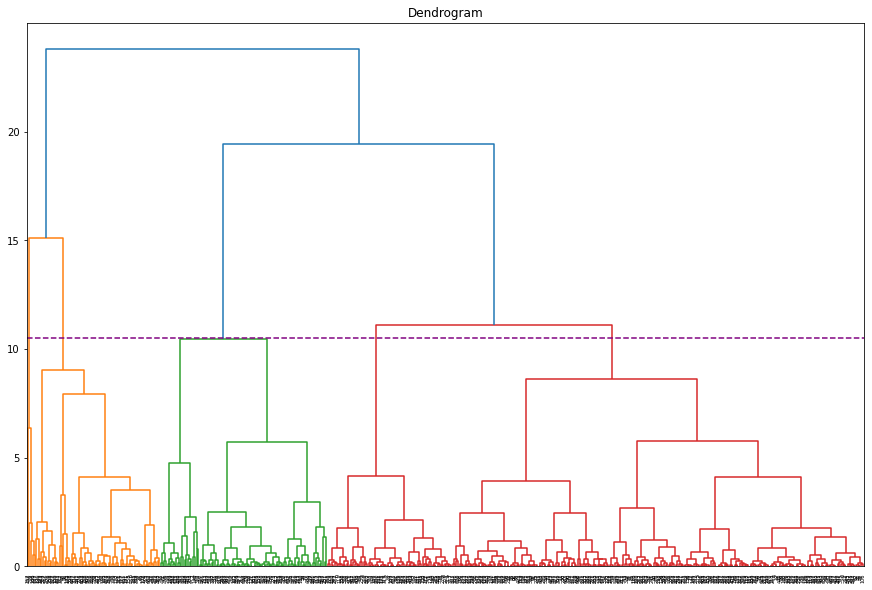

In [30]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=10.5, color='purple', linestyle='--')

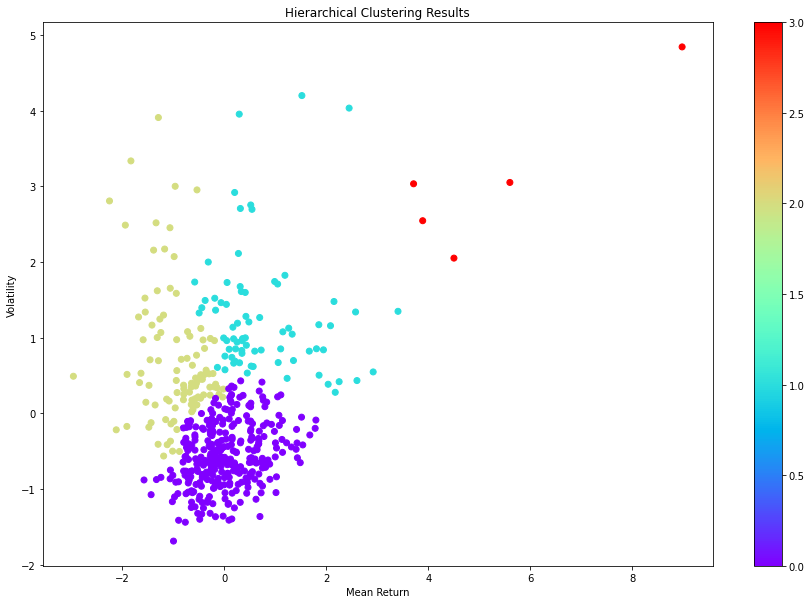

In [31]:
#Fit the model
clusters = 4
hc = AgglomerativeClustering(n_clusters= clusters, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(X)

#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, cmap='rainbow')
ax.set_title('Hierarchical Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

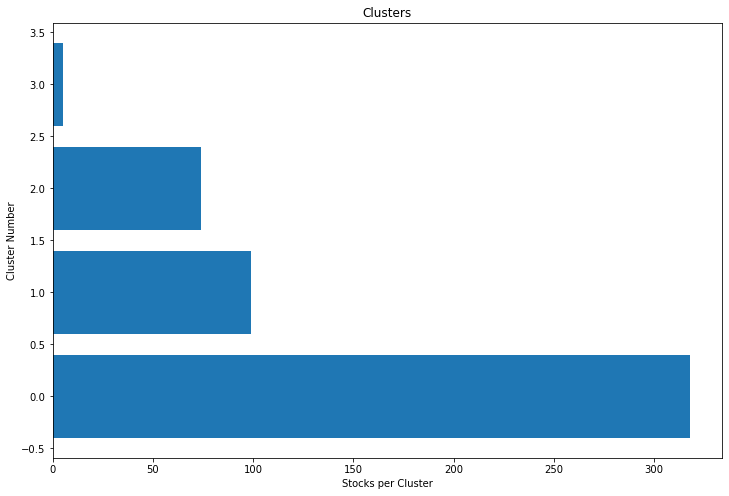

In [32]:
clustered_series = pd.Series(index=X.index, data=labels.flatten())
clustered_series_all = pd.Series(index=X.index, data=labels.flatten())
clustered_series = clustered_series[clustered_series != -1]
plt.figure(figsize=(12,8))
plt.barh(range(len(clustered_series.value_counts())),clustered_series.value_counts())
plt.title('Clusters')
plt.xlabel('Stocks per Cluster')
plt.ylabel('Cluster Number')
plt.show()

# Affinity Propagation Clustering

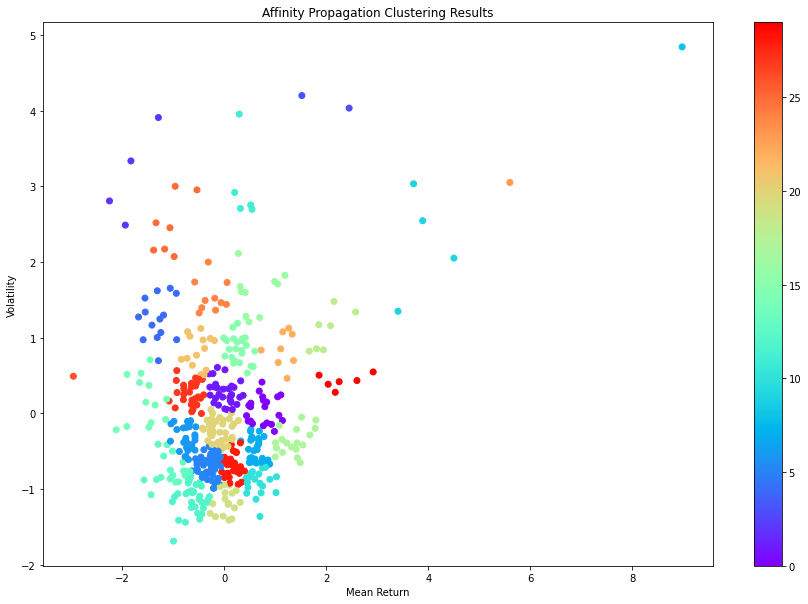

In [33]:
from sklearn.cluster import AffinityPropagation

#Fit the model
ap = AffinityPropagation()
ap.fit(X)
labels1 = ap.predict(X)

#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels1, cmap='rainbow')
ax.set_title('Affinity Propagation Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

The number of clusters is: 30


<Figure size 432x288 with 0 Axes>

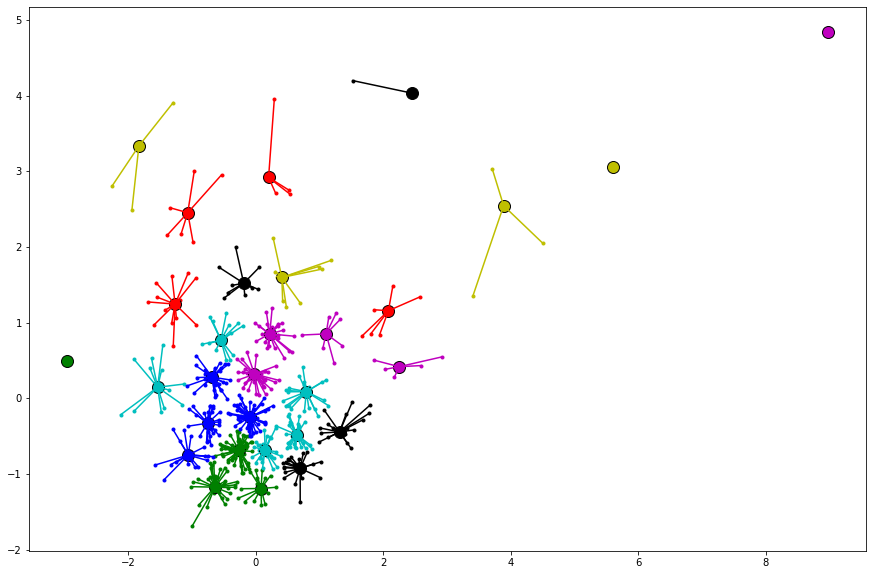

In [34]:
from itertools import cycle

#Extract the cluster centers and labels
cci = ap.cluster_centers_indices_
labels2 = ap.labels_

#Print their number
clusters = len(cci)
print('The number of clusters is:',clusters)

#Plot the results
X_ap = np.asarray(X)
plt.close('all')
plt.figure(1)
plt.clf
fig=plt.figure(figsize=(15,10))
colors = cycle('cmykrgbcmykrgbcmykrgbcmykrgb')
for k, col in zip(range(clusters),colors):
    cluster_members = labels2 == k
    cluster_center = X_ap[cci[k]]
    plt.plot(X_ap[cluster_members, 0], X_ap[cluster_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=12)
    for x in X_ap[cluster_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

Silhoutte Score

In [35]:
print("k-Means Clustering", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("Hierarchical Clustering", metrics.silhouette_score(X, hc.fit_predict(X), metric='euclidean'))
print("Affinity Propagation Clustering", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

k-Means Clustering 0.34160887385841954
Hierarchical Clustering 0.37958790943597037
Affinity Propagation Clustering 0.34671159490968434


In [36]:
cluster_size_limit = 1000
counts = clustered_series.value_counts()
ticker_count = counts[(counts>1) & (counts<=cluster_size_limit)]
print ("Number of clusters: %d" % len(ticker_count))
print ("Number of Pairs: %d" % (ticker_count*(ticker_count-1)).sum())

Number of clusters: 4
Number of Pairs: 115930


In [74]:
data1 = pd.read_csv("S&P500_stock_data")

In [75]:
def find_cointegrated_pairs(data, significance=0.05):
    n = data.shape[1]    
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [1]:
from statsmodels.tsa.stattools import coint

cluster_dict = {}

for i, clust in enumerate(ticker_count.index):
    tickers = clustered_series[clustered_series == clust].index
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(data1[tickers])
    cluster_dict[clust] = {}
    cluster_dict[clust]['score_matrix'] = score_matrix
    cluster_dict[clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[clust]['pairs'] = pairs
    
pairs = []   
for cluster in cluster_dict.keys():
    pairs.extend(cluster_dict[cluster]['pairs'])
    
print ("Number of pairs:", len(pairs))
print ("In those pairs, we found %d unique tickers." % len(np.unique(pairs)))
print(pairs)

NameError: name 'ticker_count' is not defined

In [47]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

stocks = np.unique(pairs)
X_data = pd.DataFrame(index=X.index, data=X).T
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_data.T.loc[stocks]
X_pairs.head()

,returns,volatility
ticker,,
A,0.296,-0.795
AAL,-2.249,2.805
BA,-1.058,1.651
CCL,-1.829,3.334
CRL,1.141,-0.097


In [48]:
X_tsne = TSNE(learning_rate=30, perplexity=5, random_state=42, n_jobs=-1).fit_transform(X_pairs)
X_tsne

/home/sanjju/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[ 18.891375  , -18.032154  ],
       [-30.339788  ,  20.846384  ],
       [-20.450214  ,  18.953587  ],
       [-28.749855  ,  27.214201  ],
       [  0.23513433, -50.241077  ],
       [ 21.288176  ,  -7.687418  ],
       [ -7.195186  , -12.647895  ],
       [  3.4367929 , -24.45073   ],
       [ 27.208054  , -11.51393   ],
       [  5.8814535 , -32.66154   ],
       [ 29.726334  ,  -1.2101312 ],
       [-14.618773  , -12.217714  ],
       [ -2.2096612 , -31.03875   ],
       [ 11.809781  , -16.233072  ],
       [  0.7978393 , -14.838115  ],
       [ -6.2731743 ,  16.527597  ],
       [ -4.7328053 , -44.534405  ],
       [ -7.771832  , -52.245     ],
       [-12.459693  ,  17.393494  ]], dtype=float32)

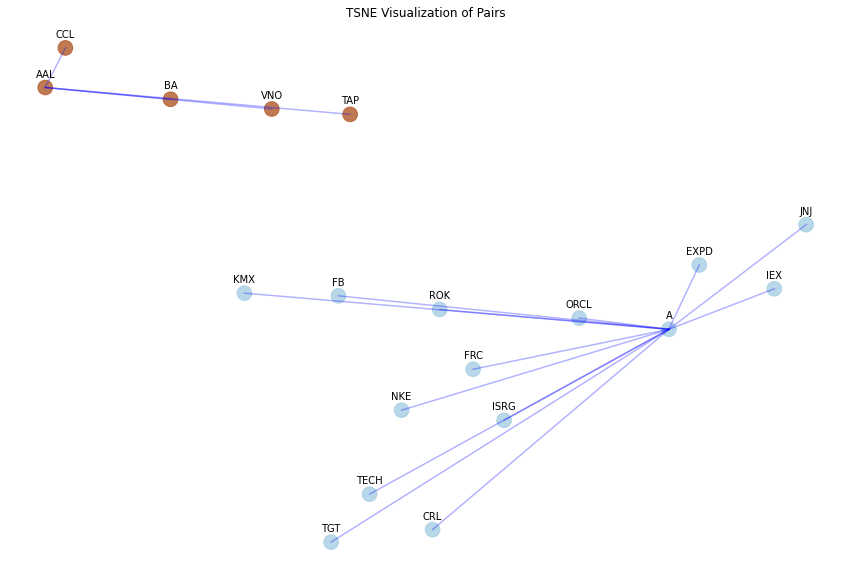

In [49]:
plt.figure(1, facecolor='white',figsize=(15,10))
plt.clf()
plt.axis('off')
for pair in pairs:
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]
    ticker2 = pair[0]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, c='b');
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=215, alpha=0.8, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('TSNE Visualization of Pairs'); 

# Join pairs by x and y
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):

    label = name

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
    
plt.show()